<a href="https://colab.research.google.com/github/GustavoAdolfoGuizaWalteros/Deep-Learning/blob/main/P1_T6_mercadeo_banacario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv")
df.head(5)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [75]:
df.shape # Columnas Filas

(41188, 19)

In [76]:
df.isnull().sum() # Verificar Valores nulos

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

In [77]:
#Valores Unicos de cada Variables
print(sorted(df["trabajo"].unique()))
print(sorted(df["estado_civil "].unique()))
print(sorted(df["educacion"].unique()))
print(sorted(df["credito_sin_pago"].unique()))
print(sorted(df["prestamo_vivienda"].unique()))
print(sorted(df["prestamo_personal"].unique()))
print(sorted(df["contacto"].unique()))
print(sorted(df["mes"].unique()))
print(sorted(df["dia_semana"].unique()))

['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
['divorced', 'married', 'single', 'unknown']
['Technological_school', 'illiterate', 'preschool', 'primary_school', 'professional.course', 'tecnical_school', 'university.degree', 'unknown']
['no', 'unknown', 'yes']
['no', 'unknown', 'yes']
['no', 'unknown', 'yes']
['cellular', 'telephone']
['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']
['fri', 'mon', 'thu', 'tue', 'wed']


In [78]:
#Reem valor numerico
valorTrabajo = {"trabajo":{"admin.":1, "entrepreneur":2, "blue-collar":3, "housemaid":4, "management":5, "retired":6, "self-employed":7, 
                          "services":8, "student":9, "technician":10, "unemployed":11, "unknown":12}}
valorEstadoCivil = {"estado_civil ":{"unknown":1, "single":2, "married":3, "divorced":4}} 
valorEducacion = {"educacion":{"unknown":1, "illiterate":2, "preschool":3, "primary_school":4, "tecnical_school":5, 
                               "Technological_school":6, "university.degree":7, "professional.course":8}} 
valorCredSinPagar = {"credito_sin_pago":{"unknown":1, "yes":2, "no":3}} 
valorPrestVivienda = {"prestamo_vivienda":{"unknown":1, "yes":2, "no":3}}
valorPrestPersonal = {"prestamo_personal":{"unknown":1, "yes":2, "no":3}}
valorContacto = {"contacto":{"telephone":1, "cellular":2}}
valorMes = {"mes":{"mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}}
valorDiasSemana = {"dia_semana":{"mon":1, "tue":2, "wed":3, "thu":4, "fri":5}} 
                                                     

In [79]:
#Reem DataFrame
df.replace(valorTrabajo, inplace=True)
df.replace(valorEstadoCivil, inplace=True)
df.replace(valorEducacion, inplace=True)
df.replace(valorCredSinPagar, inplace=True)
df.replace(valorPrestVivienda, inplace=True)
df.replace(valorPrestPersonal, inplace=True)
df.replace(valorContacto, inplace=True)
df.replace(valorMes, inplace=True)
df.replace(valorDiasSemana, inplace=True)

df.head(20)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,3,3,3,7,1,2,3,268017,0,5,2,8,4,210,43,0,88,0
1,53,10,3,1,1,3,3,3,0,0,0,2,11,5,138,0,0,14,0
2,28,5,2,7,3,3,2,3,308036,0,0,2,6,4,339,27,2,1993,1
3,39,8,3,6,1,3,3,3,0,0,4,2,4,5,185,0,0,1338,0
4,55,6,3,3,2,3,2,3,249888,0,4,2,8,5,137,2,1,1184,1
5,30,5,4,3,6,2,2,3,499476,75,1,2,7,2,68,90,0,1553,0
6,37,3,3,3,6,3,2,3,86520,0,5,2,5,4,204,66,0,442,0
7,39,3,4,5,4,3,2,3,176081,0,1,2,5,5,191,51,0,495,0
8,36,1,3,7,6,3,3,3,0,0,3,2,6,1,174,0,1,1097,1
9,27,3,2,3,3,3,2,3,323709,0,1,2,4,4,191,33,1,414,0


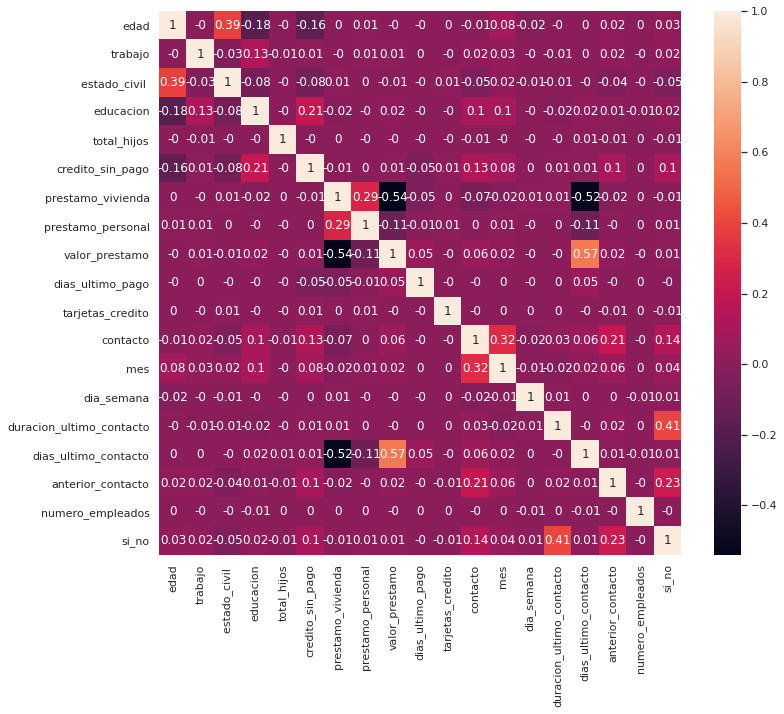

In [80]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
sns.set(rc={'figure.figsize':(11.7,10)})
correlation_matrix = df.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

In [81]:
#Entrenando IA
# Se daña x = df.dias_ultimo_contacto, df.valor_prestamo, df.duracion_ultimo_contacto, df.edad, df.mes, df.contacto
x = df
y = df.si_no

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 6)

In [87]:
regresion = LogisticRegression()

In [89]:
regresion.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_prediccion = regresion.predict(x_test)

In [91]:
porcentaje = metrics.accuracy_score(y_test, y_prediccion)
print("Porcentaje= "+str(100 * porcentaje))

Porcentaje= 89.1133339807711
